In [1]:
import scanpy as sc
import numpy as np
#import matplotlib.pyplot as plt
import singleCellHaystack as hs
import timeit

sc.set_figure_params(facecolor="white", dpi=90)

# Load data

In [2]:
adata = sc.datasets.pbmc3k_processed()
adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/Users/diez/miniconda3/envs/singleCellHaystack/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


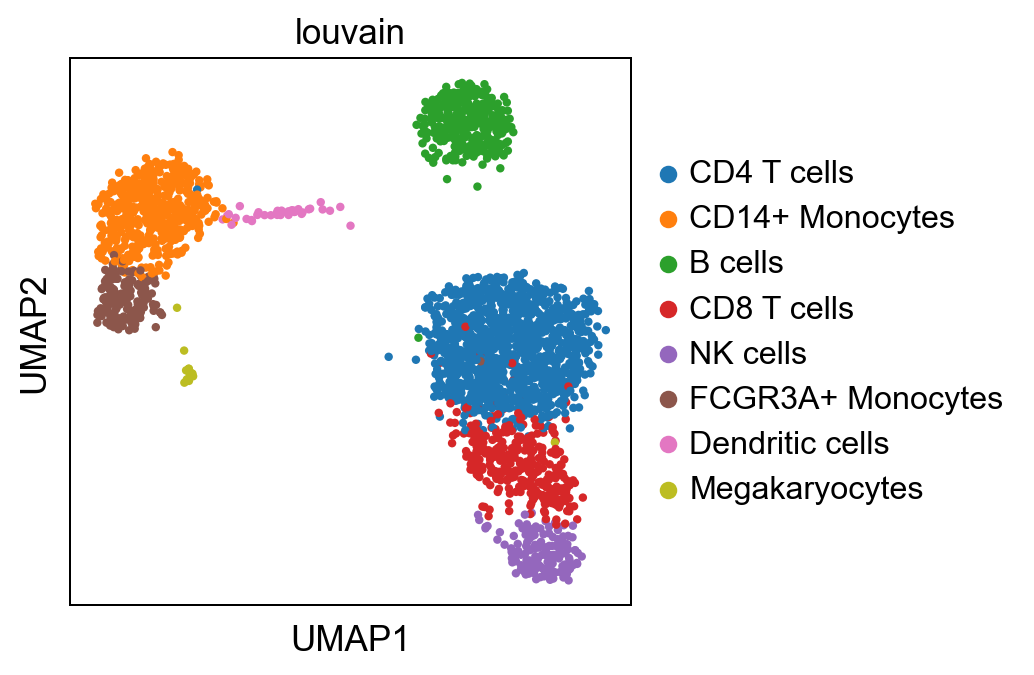

In [3]:
sc.pl.umap(adata, color="louvain")

# Run haystack

In [4]:
#%%timeit -n 1 -r 1
np.random.seed(1)
res = hs.haystack(adata.raw.to_adata(), coord="umap", n_randomizations=100, n_genes_to_randomize=100, spline_method="ns")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 features ...


100%|██████████| 13713/13713 [00:02<00:00, 4713.95it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████| 100/100 [00:04<00:00, 22.92it/s]


> calculating P values ...
> done.


# QC

We can examine some of the QC plots. First the randomization fits. These are used to calculate KLD from randomized expression levels for a subset of genes, in order to estimate the values to the entire gene set.

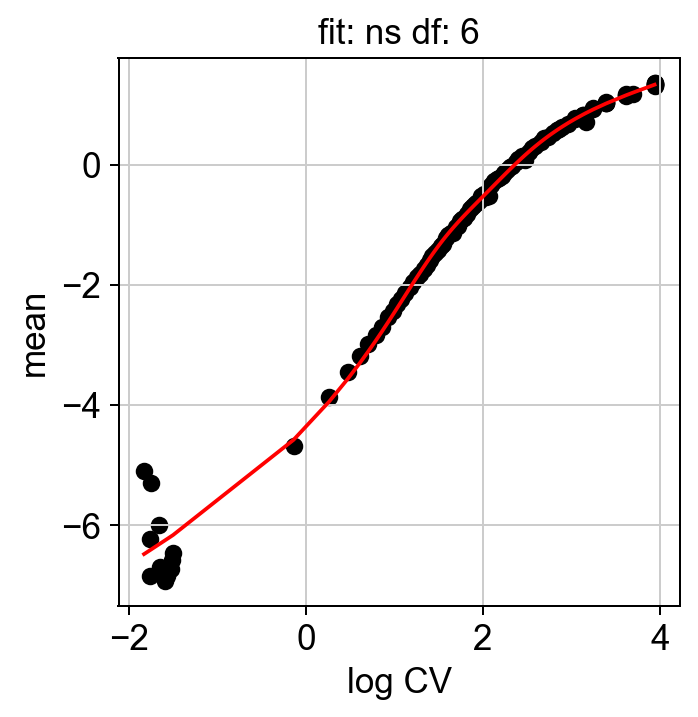

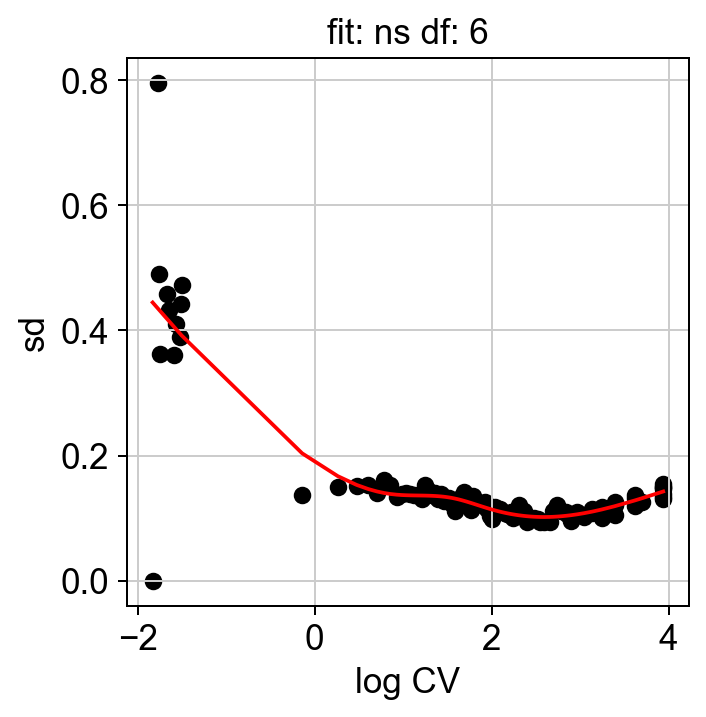

In [5]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

The ranking of logpval and distribution of pval gives us some idea of how many significant genes we can detect.

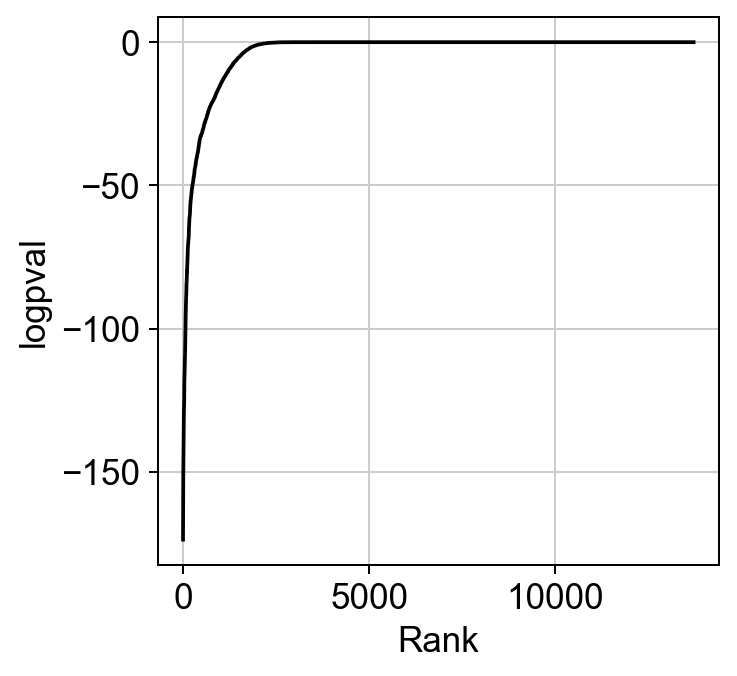

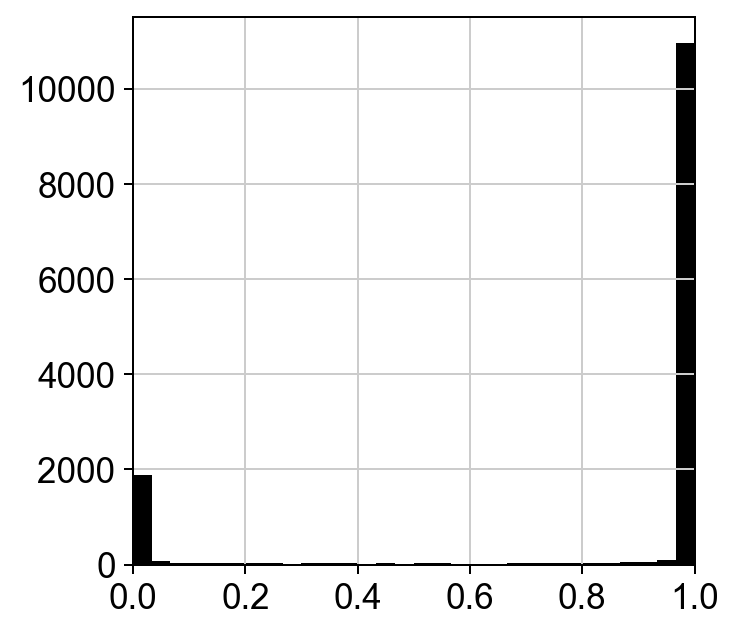

In [6]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

# Results

A pandas DataFrame with the results can be obtained. By default the results are sorted by logpval_adj.

In [7]:
sum = res["results"]
sum

gene       KLD           pval       pval_adj       logpval  \
12672   TYROBP  0.858267  2.049251e-174  2.810138e-170 -1.736884e+02   
11877     CST3  0.842005  1.100722e-167  1.509420e-163 -1.669583e+02   
1049    FCER1G  0.880699  1.012191e-166  1.388017e-162 -1.659947e+02   
907     S100A9  0.996357  3.949874e-163  5.416462e-159 -1.624034e+02   
4370      AIF1  0.792199  2.235849e-160  3.066020e-156 -1.596506e+02   
...        ...       ...            ...            ...           ...   
1398       MTR  0.497307   1.000000e+00   1.000000e+00 -3.574777e-51   
10918   TRIM16  0.544917   1.000000e+00   1.000000e+00 -2.788618e-52   
1611   THUMPD2  0.591565   1.000000e+00   1.000000e+00 -2.492840e-53   
11911    PXMP4  0.619327   1.000000e+00   1.000000e+00 -2.084382e-54   
12907    DHX34  0.660873   1.000000e+00   1.000000e+00 -4.370214e-63   

       logpval_adj  
12672  -169.551272  
11877  -162.821190  
1049   -161.857605  
907    -158.266284  
4370   -155.513425  
...            ...  
1398      0.000000  
10918     0.000000  
1611      0.000000  
11911     0.000000  
12907     0.000000  

[13713 rows x 6 columns]

Plot top 4 genes.

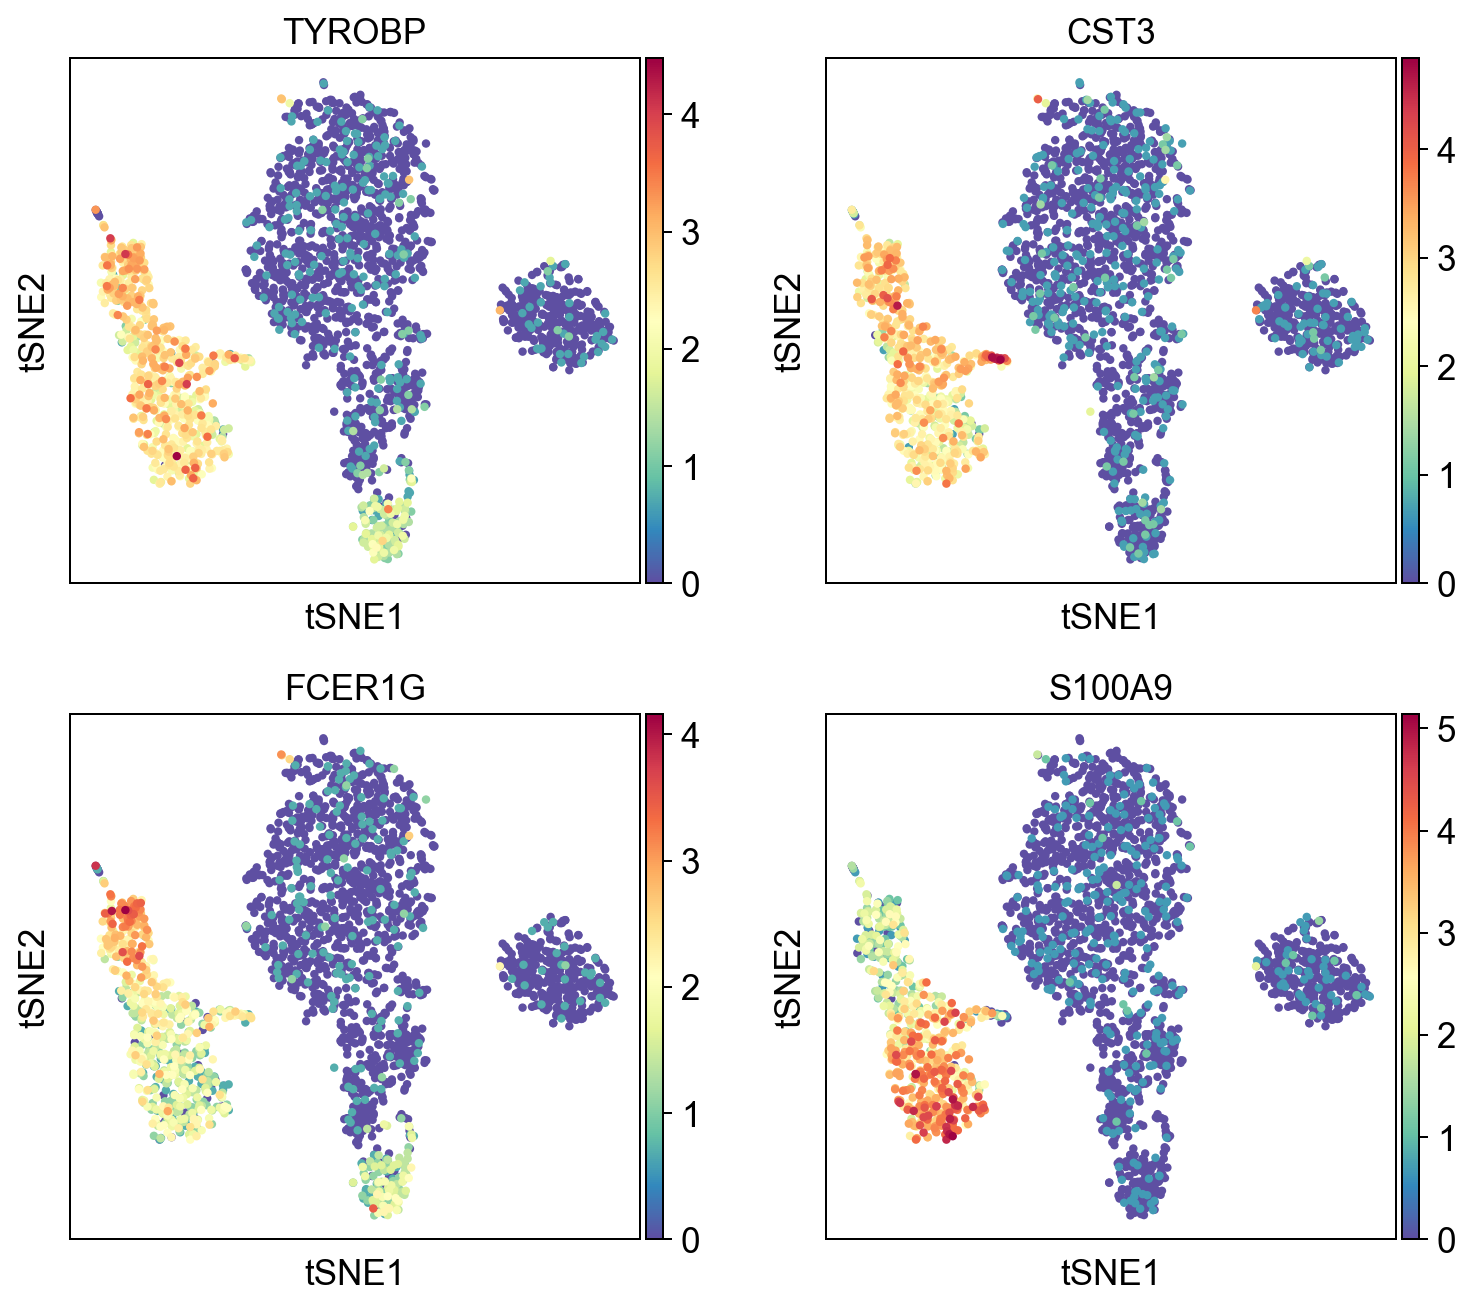

In [8]:
sc.pl.tsne(adata, color=sum.gene.iloc[:4], ncols=2, cmap="Spectral_r")

# Export results

In [9]:
#sum.to_csv("pbmc3k-results.tsv")